In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from tabulate import tabulate
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("botswana_bank_customer_churn.csv")

# Thông tin cơ bản về dữ liệu

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [4]:
df.isnull().sum()

RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

In [5]:
print(df.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

# Tiền xử lí dữ liệu

In [6]:
#Lọc cột không cần thiết
#Các cột không cần thiết bao gồm RowNumber, CustomerId, Surname, First Name, Date of Birth, Address, Contact Information, Churn Reason, và Churn Date

columns_to_drop = [
    'RowNumber', 'CustomerId', 'Surname', 'First Name', 
    'Occupation', 'Address', 'Contact Information', 
    'Churn Reason', 'Churn Date'
]

# Lọc cột không cần thiết nếu chúng tồn tại trong DataFrame
filtered_data = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Kiểm tra kết quả sau khi lọc
print(filtered_data.head())  # In ra 5 dòng đầu của dữ liệu đã được lọc
print(filtered_data.columns)  # In ra danh sách các cột còn lại trong dữ liệu


  Date of Birth  Gender Marital Status  Number of Dependents    Income  \
0     8/29/1987    Male       Divorced                     3  77710.14   
1      2/7/2000  Female        Married                     1  58209.87   
2      2/3/1954  Female         Single                     1   9794.01   
3     1/15/1991  Female       Divorced                     5  15088.98   
4      4/8/1992  Female       Divorced                     2  60726.56   

  Education Level  Customer Tenure Customer Segment  \
0     High School               30           Retail   
1     High School               27              SME   
2     High School               14           Retail   
3     High School               23        Corporate   
4        Master's               22        Corporate   

  Preferred Communication Channel  Credit Score  Credit History Length  \
0                           Phone           397                     24   
1                           Email           665                     10   
2 

In [7]:
# Xử lý ngày sinh và tính tuổi
from datetime import datetime
import pandas as pd

# Chuyển đổi cột 'Date of Birth' thành datetime, nếu có lỗi thì sẽ gán NaT
filtered_data['Date of Birth'] = pd.to_datetime(filtered_data['Date of Birth'], errors='coerce')

# Tính tuổi dựa trên ngày sinh và thay thế cột 'Date of Birth' bằng cột 'age'
filtered_data['age'] = (pd.to_datetime('today') - filtered_data['Date of Birth']).dt.days // 365

# loại bỏ cột 'Date of Birth' và chỉ giữ lại tuổi
filtered_data = filtered_data.drop(columns=['Date of Birth'])

In [8]:
# Duyệt qua các cột phân loại (object)
for col in filtered_data.columns:
    if filtered_data[col].dtype == 'object':
        # Tính giá trị đếm
        value_counts = filtered_data[col].value_counts().sort_values(ascending=False)
        
        # Chuyển kết quả value_counts thành bảng
        print(f"Value counts for {col}:")
        print(tabulate(value_counts.reset_index(), headers=["Value", "Count"], tablefmt="fancy_grid"))
        print("\n" + "="*50 + "\n")

Value counts for Gender:
╒════╤═════════╤═════════╕
│    │ Value   │   Count │
╞════╪═════════╪═════════╡
│  0 │ Female  │   57830 │
├────┼─────────┼─────────┤
│  1 │ Male    │   57810 │
╘════╧═════════╧═════════╛


Value counts for Marital Status:
╒════╤══════════╤═════════╕
│    │ Value    │   Count │
╞════╪══════════╪═════════╡
│  0 │ Single   │   38684 │
├────┼──────────┼─────────┤
│  1 │ Divorced │   38539 │
├────┼──────────┼─────────┤
│  2 │ Married  │   38417 │
╘════╧══════════╧═════════╛


Value counts for Education Level:
╒════╤═════════════╤═════════╕
│    │ Value       │   Count │
╞════╪═════════════╪═════════╡
│  0 │ Master's    │   28970 │
├────┼─────────────┼─────────┤
│  1 │ Diploma     │   28950 │
├────┼─────────────┼─────────┤
│  2 │ High School │   28868 │
├────┼─────────────┼─────────┤
│  3 │ Bachelor's  │   28852 │
╘════╧═════════════╧═════════╛


Value counts for Customer Segment:
╒════╤═══════════╤═════════╕
│    │ Value     │   Count │
╞════╪═══════════╪═════════

In [9]:
# Mã hóa nhị phân các cột phân loại với 2 giá trị
filtered_data['Gender'] = filtered_data['Gender'].map({'Female': 1, 'Male': 0})
filtered_data['Preferred Communication Channel'] = filtered_data['Preferred Communication Channel'].map({'Email': 1, 'Phone': 0})

# Mã hóa các cột phân loại với nhiều giá trị và thay thế các cột cũ
filtered_data = pd.get_dummies(filtered_data, columns=['Marital Status', 'Education Level', 'Customer Segment'], drop_first=True)
filtered_data = filtered_data.astype({col: int for col in filtered_data.select_dtypes(include=['bool']).columns})

# Kiểm tra kết quả sau khi mã hóa
print(filtered_data.head())

   Gender  Number of Dependents    Income  Customer Tenure  \
0       0                     3  77710.14               30   
1       1                     1  58209.87               27   
2       1                     1   9794.01               14   
3       1                     5  15088.98               23   
4       1                     2  60726.56               22   

   Preferred Communication Channel  Credit Score  Credit History Length  \
0                                0           397                     24   
1                                1           665                     10   
2                                1           715                     21   
3                                0           747                     17   
4                                1           549                     25   

   Outstanding Loans  Churn Flag    Balance  NumOfProducts  NumComplaints  \
0           41959.74           0  211359.05              1              0   
1            8916.67  

In [10]:
# Chuẩn bị dữ liệu
X = filtered_data.drop(['Churn Flag'], axis=1)
y = filtered_data['Churn Flag']

In [11]:
# Phân tích thống kê cơ bản của dữ liệu
X.describe()


,Gender,Number of Dependents,Income,Customer Tenure,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Balance,NumOfProducts,NumComplaints,age,Marital Status_Married,Marital Status_Single,Education Level_Diploma,Education Level_High School,Education Level_Master's,Customer Segment_Retail,Customer Segment_SME
count,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000,115640.000000
mean,0.500086,2.502923,52641.363046,15.490591,0.501937,574.299775,15.546602,25502.731792,124639.209748,2.999274,4.991724,46.867399,0.332212,0.334521,0.250346,0.249637,0.250519,0.329739,0.336415
std,0.500002,1.707249,27429.756390,8.654217,0.499998,159.067499,8.654630,14127.859827,72210.476638,1.411361,3.159283,16.726095,0.471009,0.471825,0.433214,0.432805,0.433314,0.470120,0.472485
min,0.000000,0.000000,5000.960000,1.000000,0.000000,300.000000,1.000000,1000.430000,1.060000,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,28857.070000,8.000000,0.000000,436.000000,8.000000,13226.060000,61991.915000,2.000000,2.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,52658.110000,15.000000,1.000000,574.000000,16.000000,25505.285000,124505.890000,3.000000,5.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,76364.157500,23.000000,1.000000,712.000000,23.000000,37742.250000,187122.922500,4.000000,8.000000,61.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,5.000000,99999.510000,30.000000,1.000000,850.000000,30.000000,49999.690000,249998.910000,5.000000,10.000000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Count (số lượng bản ghi): Tất cả các cột đều có 115,640 bản ghi (tức là không có giá trị thiếu).
Mean (Giá trị trung bình):
Cột Gender: Trung bình gần 0.5 (giải thích rằng có khoảng 50% dữ liệu là nam và 50% là nữ, nếu mã hóa 0 = nữ và 1 = nam).
Cột Income: Trung bình khoảng 52,641.36, tức là thu nhập trung bình của khách hàng khá cao.
Cột Balance: Trung bình là khoảng 124,639.21, cho thấy số dư trung bình của khách hàng rất cao.
Cột Credit Score: Trung bình là 574.3, một mức khá trung bình cho điểm tín dụng.
Cột NumOfProducts: Trung bình là 2.99, cho thấy khách hàng thường sử dụng khoảng 3 sản phẩm từ ngân hàng.
Các cột nhị phân (ví dụ: Gender, Marital Status, Preferred Communication Channel) có giá trị trung bình khoảng 0.5 (giải thích là có sự phân chia gần đều giữa các lớp).
Standard Deviation (Độ lệch chuẩn):
Các cột như Income, Balance có độ lệch chuẩn lớn (lên đến 72,210 cho Balance), chỉ ra sự phân tán lớn trong các giá trị này.
Các cột như Gender, Marital Status có độ lệch chuẩn nhỏ (gần 0.5), vì đây là các cột nhị phân.
Min (Giá trị nhỏ nhất) và Max (Giá trị lớn nhất):
Các giá trị min và max cho thấy sự phân bố rộng của các trường như Income, Balance (ví dụ: Income từ 5,000 đến 99,999, Balance từ 1.06 đến 249,998.91).
Percentiles (Phân vị):
Các phân vị 25%, 50%, 75% cho thấy dữ liệu phân phối khá đồng đều, đặc biệt với các cột như Income, Balance, Credit Score. Một số cột có phân vị rất tập trung (ví dụ: Gender có phân vị chủ yếu ở 0 và 1).

# Sử dụng PCA

In [12]:
# Bước 2: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.decomposition import PCA

# Áp dụng PCA
pca = PCA(n_components=5)  # Giảm xuống còn 5 thành phần chính
X_pca = pca.fit_transform(X_scaled)

# Kiểm tra tỷ lệ phương sai giải thích của các thành phần
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích: {explained_variance_ratio}")
print(f"Tổng phương sai giải thích: {np.sum(explained_variance_ratio)}")


Tỷ lệ phương sai giải thích: [0.07909064 0.07881691 0.0702451  0.0701712  0.05372129]
Tổng phương sai giải thích: 0.35204514873990006


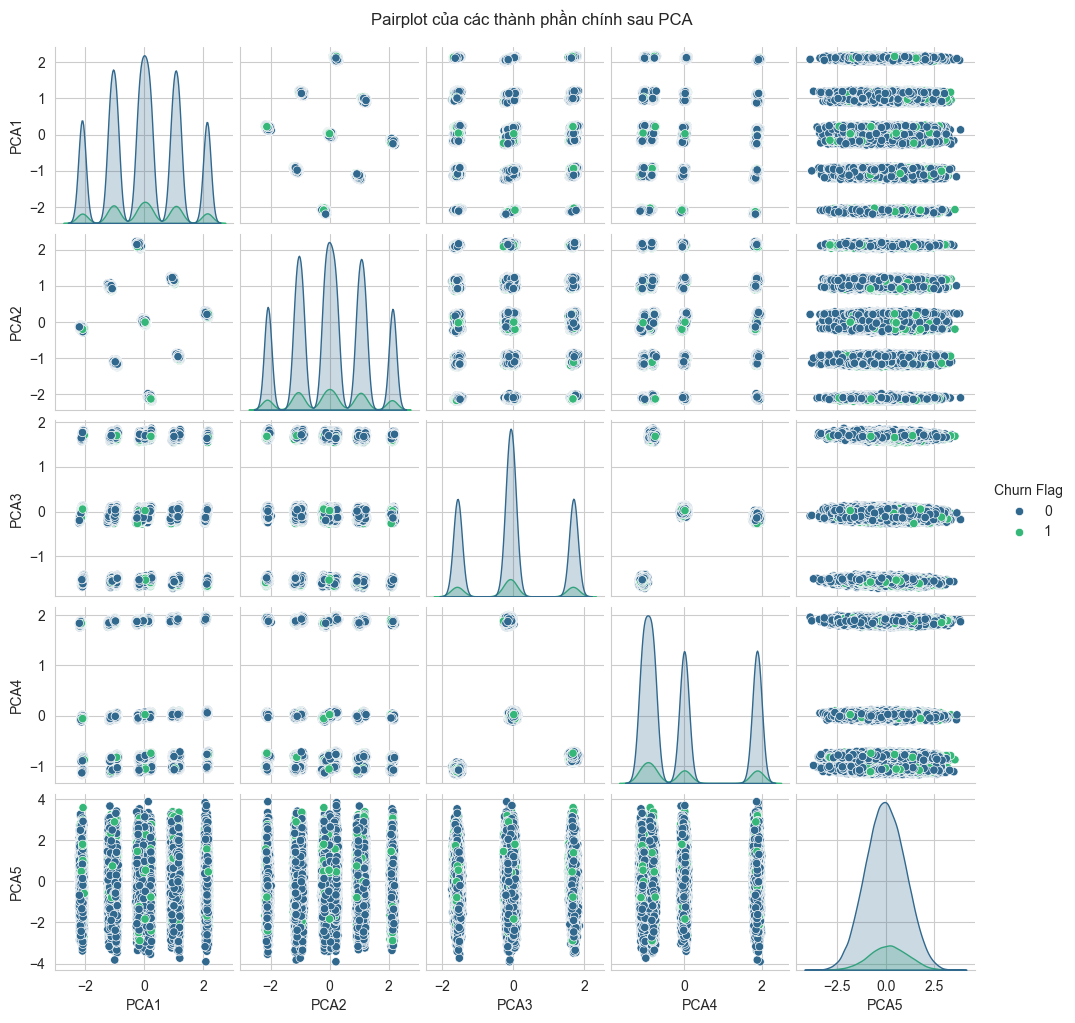

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tạo DataFrame với các thành phần chính
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5'])

# Thêm nhãn 'Churn Flag' vào DataFrame
pca_df['Churn Flag'] = y

# Sử dụng pairplot để hiển thị mối quan hệ giữa các thành phần chính và phân loại theo 'Churn Flag'
sns.pairplot(pca_df, hue='Churn Flag', palette='viridis', height=2)  # 80% của giá trị mặc định là 3

# Hiển thị trực quan hóa
plt.suptitle('Pairplot của các thành phần chính sau PCA', y=1.02)
plt.show()



# Sử dụng LDA

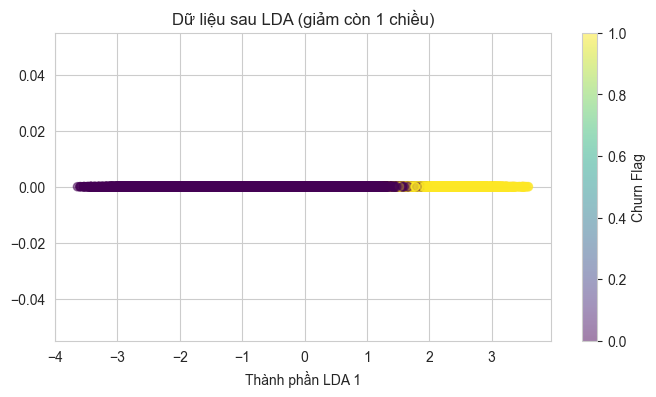

Tỷ lệ phương sai giải thích bởi thành phần LDA 1: 1.00


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Bước 3: Áp dụng LDA với 2 thành phần chính
lda = LDA(n_components=1)
X_lda_1d = lda.fit_transform(X_scaled, y)

# Bước 4: Trực quan hóa dữ liệu sau khi giảm chiều
plt.figure(figsize=(8, 4))
plt.scatter(X_lda_1d[:, 0], [0] * len(X_lda_1d), c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Thành phần LDA 1')
plt.title('Dữ liệu sau LDA (giảm còn 1 chiều)')
plt.colorbar(label='Churn Flag')
plt.grid(True)
plt.show()

# In thông tin quan trọng
explained_variance_ratio = lda.explained_variance_ratio_
print(f"Tỷ lệ phương sai giải thích bởi thành phần LDA 1: {explained_variance_ratio[0]:.2f}")

Hình vẽ thể hiện dữ liệu sau khi áp dụng giảm chiều với LDA, chỉ còn một chiều (thành phần LDA 1).
Các điểm dữ liệu được phân biệt bởi màu sắc, với hai màu chủ yếu là vàng và tím, tượng trưng cho hai lớp khác nhau của biến mục tiêu "Churn Flag" (Churn Flag = 0 và Churn Flag = 1).
Phân tách khá rõ: Dữ liệu giữa hai lớp (vàng và tím) có sự phân tách khá rõ ràng trong hầu hết các trường hợp, với phần lớn các điểm vàng nằm về một phía và các điểm tím nằm về phía còn lại.
Sự tách biệt mơ hồ ở giữa: Tuy nhiên, ở giữa hai lớp (vàng và tím), có một số điểm dữ liệu có sự pha trộn màu sắc (khoảng màu giao thoa giữa vàng và tím). Điều này chỉ ra rằng mặc dù LDA đã cố gắng giảm chiều và phân biệt các lớp, nhưng vẫn có sự chồng lấn giữa các điểm của hai lớp, dẫn đến các điểm không thể phân biệt rõ ràng.
Chồng lấn giữa vàng và tím: Các điểm ở vùng giữa có sự chồng lấn giữa hai màu (vàng và tím), cho thấy rằng một số điểm dữ liệu có thể thuộc vào cả hai lớp hoặc có tính chất không rõ ràng. Điều này có thể do các điểm dữ liệu có đặc trưng tương tự nhau ở không gian ban đầu, khiến LDA khó có thể phân loại chúng hoàn toàn chính xác khi giảm chiều xuống.
Ảnh hưởng của các đặc trưng không đủ phân biệt: Sự chồng lấn có thể là do đặc trưng dữ liệu không đủ mạnh để phân biệt giữa các lớp trong không gian giảm chiều. Nếu các đặc trưng không có sự khác biệt rõ ràng giữa các lớp, LDA sẽ không thể tìm ra sự phân tách rõ ràng trong không gian giảm chiều.
Hình vẽ sau khi giảm chiều bằng LDA cho thấy rằng mặc dù phương pháp này có thể phân biệt các lớp ở mức độ nhất định, nhưng vẫn có sự chồng lấn giữa các điểm dữ liệu ở vùng giữa hai lớp, cho thấy LDA không thể hoàn toàn tách biệt các lớp trong không gian một chiều. Điều này phản ánh một thách thức trong việc phân tích dữ liệu với đặc trưng không đủ phân biệt hoặc khi dữ liệu có sự chồng lấn giữa các lớp.

# Áp dụng mô hình hồi quy logistic với naive bayes trên tập dữ liệu đã xử lí

In [25]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.model_selection import train_test_split
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X,y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
X_train_6_4, X_test_6_4, y_train_6_4, y_test_6_4 = train_test_split(X,y, test_size=0.4, random_state=42)

# 7-3

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Huấn luyện mô hình Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_7_3, y_train_7_3)

# Dự đoán trên tập kiểm tra
y_pred_1 = logistic_regression.predict(X_test_7_3)

# Đánh giá mô hình trên tập kiểm tra
print("Classification Report on Test Set:")
print(classification_report(y_test_7_3, y_pred_1))

# Dự đoán trên tập huấn luyện
y_train_pred = logistic_regression.predict(X_train_7_3)

# Đánh giá mô hình trên tập huấn luyện
print("Classification Report on Training Set:")
print(classification_report(y_train_7_3, y_train_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     30419
           1       0.78      0.58      0.66      4273

    accuracy                           0.93     34692
   macro avg       0.86      0.78      0.81     34692
weighted avg       0.92      0.93      0.92     34692

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     71127
           1       0.78      0.60      0.68      9821

    accuracy                           0.93     80948
   macro avg       0.87      0.79      0.82     80948
weighted avg       0.93      0.93      0.93     80948



D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

# Huấn luyện mô hình Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_7_3, y_train_7_3)

# Dự đoán trên tập huấn luyện
y_train_pred = gnb.predict(X_train_7_3)

# Đánh giá mô hình trên tập huấn luyện
print("Classification Report on Training Set:")
print(classification_report(y_train_7_3, y_train_pred))

# Dự đoán trên tập kiểm tra
y_pred = gnb.predict(X_test_7_3)

# Đánh giá mô hình trên tập kiểm tra
print("Classification Report on Test Set:")
print(classification_report(y_test_7_3, y_pred))

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     71127
           1       0.80      0.79      0.79      9821

    accuracy                           0.95     80948
   macro avg       0.88      0.88      0.88     80948
weighted avg       0.95      0.95      0.95     80948

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30419
           1       0.80      0.77      0.79      4273

    accuracy                           0.95     34692
   macro avg       0.88      0.87      0.88     34692
weighted avg       0.95      0.95      0.95     34692



# 6-4

In [26]:
# Huấn luyện và đánh giá Logistic Regression
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(X_train_6_4, y_train_6_4)

# Dự đoán trên tập kiểm tra
y_pred_test_6_4 = logistic_regression.predict(X_test_6_4)
print("=== Classification Report on Test Set (6:4) ===")
print(classification_report(y_test_6_4, y_pred_test_6_4))

# Dự đoán trên tập huấn luyện
y_pred_train_6_4 = logistic_regression.predict(X_train_6_4)
print("=== Classification Report on Training Set (6:4) ===")
print(classification_report(y_train_6_4, y_pred_train_6_4))

=== Classification Report on Test Set (6:4) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     40576
           1       0.89      0.80      0.84      5680

    accuracy                           0.96     46256
   macro avg       0.93      0.89      0.91     46256
weighted avg       0.96      0.96      0.96     46256

=== Classification Report on Training Set (6:4) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     60970
           1       0.89      0.81      0.85      8414

    accuracy                           0.97     69384
   macro avg       0.93      0.90      0.91     69384
weighted avg       0.96      0.97      0.96     69384



D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Huấn luyện mô hình Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_6_4, y_train_6_4)

# Dự đoán trên tập huấn luyện
y_train_pred_6_4 = gnb.predict(X_train_6_4)

# Đánh giá trên tập huấn luyện
print("=== Classification Report on Training Set (6:4) ===")
print(classification_report(y_train_6_4, y_train_pred_6_4))

# Dự đoán trên tập kiểm tra
y_test_pred_6_4 = gnb.predict(X_test_6_4)

# Đánh giá trên tập kiểm tra
print("=== Classification Report on Test Set (6:4) ===")
print(classification_report(y_test_6_4, y_test_pred_6_4))

=== Classification Report on Training Set (6:4) ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     60970
           1       0.80      0.79      0.79      8414

    accuracy                           0.95     69384
   macro avg       0.88      0.88      0.88     69384
weighted avg       0.95      0.95      0.95     69384

=== Classification Report on Test Set (6:4) ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     40576
           1       0.79      0.77      0.78      5680

    accuracy                           0.95     46256
   macro avg       0.88      0.87      0.88     46256
weighted avg       0.95      0.95      0.95     46256



# 8-2

In [30]:
# Huấn luyện và đánh giá Logistic Regression
logistic_regression = LogisticRegression(max_iter=500)
logistic_regression.fit(X_train_4_1, y_train_4_1)

# Dự đoán trên tập kiểm tra
y_pred_test_4_1 = logistic_regression.predict(X_test_4_1)
print("=== Classification Report on Test Set (8:2) ===")
print(classification_report(y_test_4_1, y_pred_test_4_1))

# Dự đoán trên tập huấn luyện
y_pred_train_4_1 = logistic_regression.predict(X_train_4_1)
print("=== Classification Report on Training Set (8:2) ===")
print(classification_report(y_train_4_1, y_pred_train_4_1))

=== Classification Report on Test Set (8:2) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20301
           1       0.89      0.80      0.84      2827

    accuracy                           0.96     23128
   macro avg       0.93      0.89      0.91     23128
weighted avg       0.96      0.96      0.96     23128

=== Classification Report on Training Set (8:2) ===
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     81245
           1       0.88      0.81      0.84     11267

    accuracy                           0.96     92512
   macro avg       0.93      0.90      0.91     92512
weighted avg       0.96      0.96      0.96     92512



D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
gnb = GaussianNB()
gnb.fit(X_train_4_1, y_train_4_1)

# Dự đoán trên tập huấn luyện
y_train_pred_4_1 = gnb.predict(X_train_4_1)

# Đánh giá trên tập huấn luyện
print("=== Classification Report on Training Set (4:1) ===")
print(classification_report(y_train_4_1, y_train_pred_4_1))

# Dự đoán trên tập kiểm tra
y_test_pred_4_1 = gnb.predict(X_test_4_1)

# Đánh giá trên tập kiểm tra
print("=== Classification Report on Test Set (4:1) ===")
print(classification_report(y_test_4_1, y_test_pred_4_1))

=== Classification Report on Training Set (4:1) ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     81245
           1       0.80      0.79      0.79     11267

    accuracy                           0.95     92512
   macro avg       0.88      0.88      0.88     92512
weighted avg       0.95      0.95      0.95     92512

=== Classification Report on Test Set (4:1) ===
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     20301
           1       0.80      0.77      0.79      2827

    accuracy                           0.95     23128
   macro avg       0.89      0.87      0.88     23128
weighted avg       0.95      0.95      0.95     23128



# Áp dụng mô hình hồi quy logistic với naive bayes trên tập dữ liệu đã giảm chiều PCA, LDA

In [21]:
# Chia dữ liệupca 
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_7_3, y_test_7_3 = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train_7_3)
y_pred = gnb.predict(X_test_pca)
print("Classification Report:")
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
print(classification_report(y_test_7_3, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     30419
           1       0.00      0.00      0.00      4273

    accuracy                           0.88     34692
   macro avg       0.44      0.50      0.47     34692
weighted avg       0.77      0.88      0.82     34692



D:\Machine learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Machine learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Machine learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max

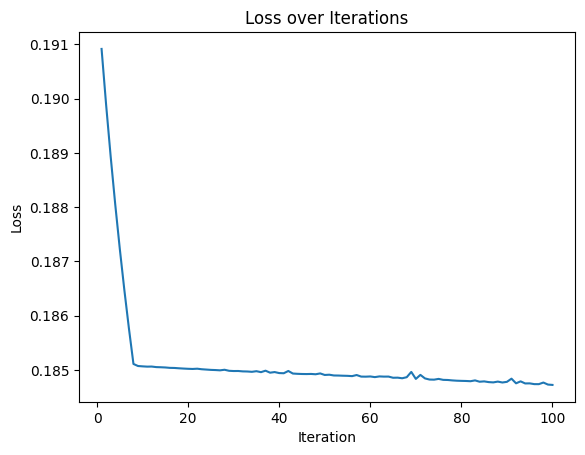

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     30419
           1       0.69      0.45      0.54      4273

    accuracy                           0.91     34692
   macro avg       0.81      0.71      0.74     34692
weighted avg       0.90      0.91      0.90     34692



In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np

# Khởi tạo mô hình Logistic Regression với solver 'saga'
logistic_regression = LogisticRegression(solver='saga', max_iter=1000, warm_start=True)

# Danh sách lưu trữ hàm loss qua từng vòng lặp
losses = []

# Huấn luyện mô hình và theo dõi loss qua các vòng lặp
for i in range(100):  # Giới hạn số vòng lặp
    logistic_regression.fit(X_train_7_3, y_train_7_3)
    
    # Dự đoán xác suất
    y_prob = logistic_regression.predict_proba(X_train_7_3)
    
    # Tính toán log_loss và lưu vào danh sách losses
    loss = log_loss(y_train_7_3, y_prob)
    losses.append(loss)

# Hiển thị đồ thị hàm loss qua các vòng lặp
plt.plot(range(1, len(losses)+1), losses)
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Dự đoán và đánh giá mô hình
y_pred_1 = logistic_regression.predict(X_test_7_3)
print("Classification Report:")
print(classification_report(y_test_7_3, y_pred_1))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     30419
           1       0.75      0.60      0.66      4273

    accuracy                           0.93     34692
   macro avg       0.85      0.79      0.81     34692
weighted avg       0.92      0.93      0.92     34692

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     71127
           1       0.75      0.61      0.68      9821

    accuracy                           0.93     80948
   macro avg       0.85      0.79      0.82     80948
weighted avg       0.92      0.93      0.93     80948



D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Huấn luyện mô hình Logistic Regression
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear')
logistic_regression.fit(X_train_7_3, y_train_7_3)

# Dự đoán trên tập kiểm tra
y_pred_1 = logistic_regression.predict(X_test_7_3)

# Đánh giá mô hình trên tập kiểm tra
print("Classification Report on Test Set:")
print(classification_report(y_test_7_3, y_pred_1))

# Dự đoán trên tập huấn luyện
y_train_pred = logistic_regression.predict(X_train_7_3)

# Đánh giá mô hình trên tập huấn luyện
print("Classification Report on Training Set:")
print(classification_report(y_train_7_3, y_train_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30419
           1       1.00      0.99      1.00      4273

    accuracy                           1.00     34692
   macro avg       1.00      1.00      1.00     34692
weighted avg       1.00      1.00      1.00     34692

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71127
           1       1.00      1.00      1.00      9821

    accuracy                           1.00     80948
   macro avg       1.00      1.00      1.00     80948
weighted avg       1.00      1.00      1.00     80948



In [109]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression.fit(X_train_7_3, y_train_7_3)
y_pred_1 = logistic_regression.predict(X_test_7_3)
# Đánh giá mô hình

print("Classification Report:")
print(classification_report(y_test_7_3, y_pred_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     30419
           1       0.71      0.53      0.61      4273

    accuracy                           0.91     34692
   macro avg       0.82      0.75      0.78     34692
weighted avg       0.91      0.91      0.91     34692



In [110]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
logistic_regression.fit(X_train_7_3, y_train_7_3)
y_pred_1 = logistic_regression.predict(X_test_7_3)
# Đánh giá mô hình

print("Classification Report:")
print(classification_report(y_test_7_3, y_pred_1))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     30419
           1       0.67      0.42      0.52      4273

    accuracy                           0.90     34692
   macro avg       0.80      0.70      0.73     34692
weighted avg       0.89      0.90      0.89     34692



D:\Machine learning\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_7_3)
X_test_scaled = scaler.transform(X_test_7_3)

# Huấn luyện mô hình Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train_7_3)

# Dự đoán
y_pred_1 = logistic_regression.predict(X_test_scaled)

# Đánh giá mô hình
print("Classification Report:")
print(classification_report(y_test_7_3, y_pred_1))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30419
           1       1.00      1.00      1.00      4273

    accuracy                           1.00     34692
   macro avg       1.00      1.00      1.00     34692
weighted avg       1.00      1.00      1.00     34692



In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

# Huấn luyện mô hình Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_7_3)

# Dự đoán trên tập kiểm tra
y_pred = gnb.predict(X_test_scaled)

# Đánh giá mô hình trên tập kiểm tra
print("Classification Report on Test Set:")
print(classification_report(y_test_7_3, y_pred))

# Dự đoán trên tập huấn luyện
y_train_pred = gnb.predict(X_train_scaled)

# Đánh giá mô hình trên tập huấn luyện
print("Classification Report on Training Set:")
print(classification_report(y_train_7_3, y_train_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     30419
           1       0.94      0.79      0.86      4273

    accuracy                           0.97     34692
   macro avg       0.96      0.89      0.92     34692
weighted avg       0.97      0.97      0.97     34692

Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     71127
           1       0.95      0.80      0.87      9821

    accuracy                           0.97     80948
   macro avg       0.96      0.90      0.93     80948
weighted avg       0.97      0.97      0.97     80948



In [112]:
# from sklearn.svm import SVC
# clf = SVC(kernel='linear')
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# from sklearn.metrics import accuracy_score
# print("Classification Report:")
# print(classification_report(y_test, y_pred))